In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
G = .01
M = 500.
m = .1
dt = .001

In [3]:
def force(r):
    """
    Computes the force at a given position.
    
    Args:
        r: array of shape (2,), position
        
    Returns:
        array of shape (2,), force at a given position
    """
    return ((-G*M*m) / np.power(np.dot(r, r), 3/2.)) * r

def potential(r):
    """
    Computes the potential energy at a given position.
    
    Args:
        r: array of shape (2, -1), position
        
    Returns:
        array of shape (-1,), potential at a given position
    """
    return (-G*M*m) / np.linalg.norm(r, axis=1)

def kinetic(p):
    """
    Computes the potential energy at a given position.
    
    Args:
        p: array of shape (2, -1), momentum
        
    Returns:
        array of shape (-1,), kinetic energy
    """
    return np.square(np.linalg.norm(momentums, axis=1)) / (2*m)

def energy(p, r):
    return potential(r) + kinetic(p)

In [4]:
class Particle:
    """
    Holds information about the simulated body.
    
    Args:
        r0: array, initial position
        p0: array, initial momentum
    """
    
    def __init__(self, r0, p0, F=None):
        self.r0 = r0
        self.position = np.copy(r0)
        
        self.t = 0.

        # For Euler
        self.p0 = p0
        self.momentum = np.copy(p0)       
        
        # For Verlet
        self.pos_prev = self.r0 - (self.p0 / m) * dt
        
        # For Leapfrog
        if F is None:
            F = force(self.r0)
            
        self.v = (self.p0/m) - (0.5 * F * dt) / m
            
        
    def evolve_euler(self, F=None):
        """
        Performs a position and momentum update according to the Euler's algorithm.
        """
        self.t += dt
        if F is None:
            F = force(self.position)
        
        self.position += (self.momentum / m) * dt + (.5 * (F / m)) * dt**2
        self.momentum += F * dt
    
    def evolve_verlet(self, F=None):
        """
        Performs a position update according to the Verlet's algorithm.
        """
        self.t += dt
        if F is None:
            F = force(self.position)
        
        r_new = 2*self.position - self.pos_prev + ((F/m) * dt**2)
        
        self.momentum = (m*(r_new - self.pos_prev)) / (2*dt)
        
        self.pos_prev = np.copy(self.position)
        self.position = np.copy(r_new)

        
    def evolve_frog(self, F=None):
        """Preforms a position update according to the leapfrog algorithm."""
        self.t += dt
        if F is None:
            F = force(self.position)
        
        v_new = self.v + (F/m) * dt
        self.momentum = (m*(self.v + v_new)) / 2.
        self.v = v_new
        self.position += self.v * dt
    
    
    def __str__(self):
        return "Particle(" + str(self.position) + ", " + str(self.momentum) + ")"
    
    def __repr__(self):
        return "Particle(" + str(self.position) + ", " + str(self.momentum) + ")"

# Euler's algorithm

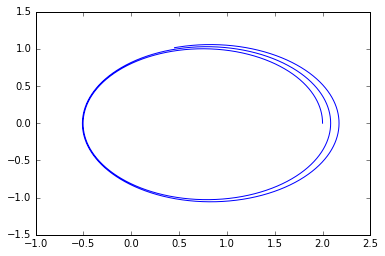

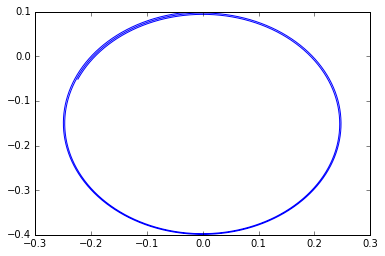

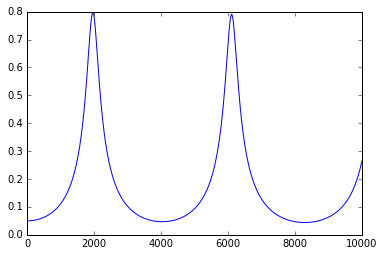

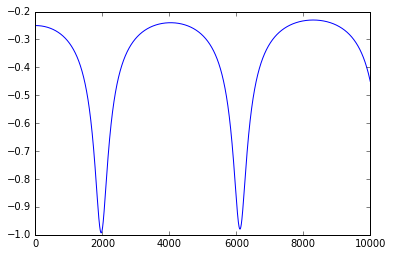

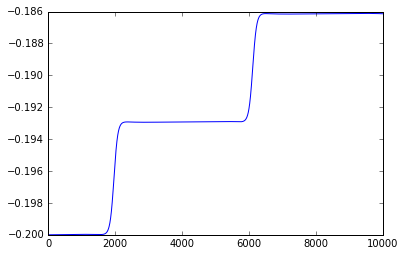

CPU times: user 1.66 s, sys: 1.38 s, total: 3.04 s
Wall time: 1.48 s


In [5]:
%%time

r = np.array([
        2., # X
        0., # Y
    ])

p = np.array([
        0,
        0.1,
    ])

body = Particle(r, p)

locations = np.array([r])
momentums = np.array([p])

for i in range(10000):
    body.evolve_euler()
    pos, mom = np.copy(body.position), np.copy(body.momentum)
    locations = np.vstack((locations, pos))
    momentums = np.vstack((momentums, mom))
    

plt.plot(locations[:,0], locations[:,1])
plt.show()

plt.plot(momentums[:,0], momentums[:,1])
plt.show()

T, V, E = kinetic(momentums), potential(locations), energy(momentums, locations)

plt.plot(T)
plt.show()

plt.plot(V)
plt.show()

plt.plot(E)
plt.show()

# Verlet's algorithm

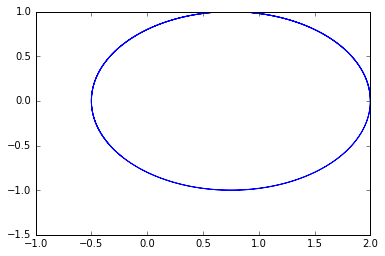

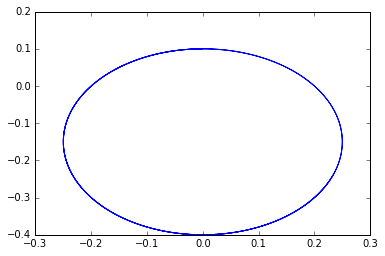

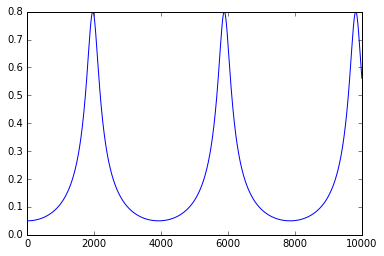

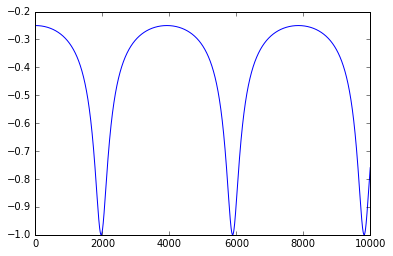

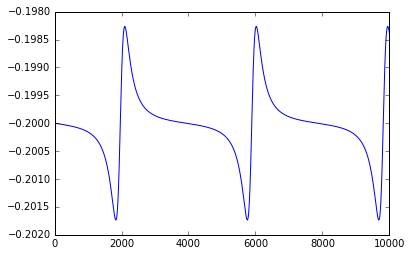

CPU times: user 1.89 s, sys: 1.47 s, total: 3.36 s
Wall time: 1.64 s


In [6]:
%%time

r = np.array([
        2., # X
        0., # Y
    ])

p = np.array([
        0,
        0.1,
    ])

body = Particle(r, p)

locations = np.array([r])
momentums = np.array([p])

for i in range(10000):
    body.evolve_verlet()
    pos, mom = np.copy(body.position), np.copy(body.momentum)
    locations = np.vstack((locations, pos))
    momentums = np.vstack((momentums, mom))
    

plt.plot(locations[:,0], locations[:,1])
plt.show()

plt.plot(momentums[:,0], momentums[:,1])
plt.show()

T, V, E = kinetic(momentums), potential(locations), energy(momentums, locations)

plt.plot(T)
plt.show()

plt.plot(V)
plt.show()

plt.plot(E)
plt.show()

# Leapfrog algorithm

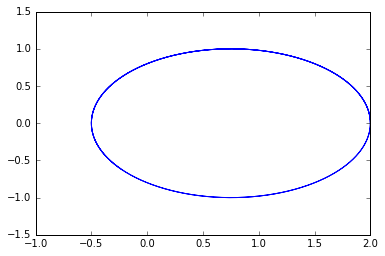

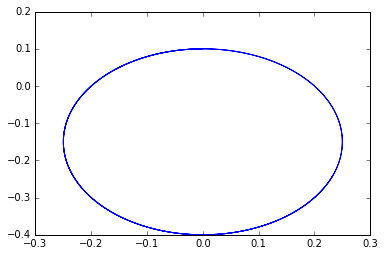

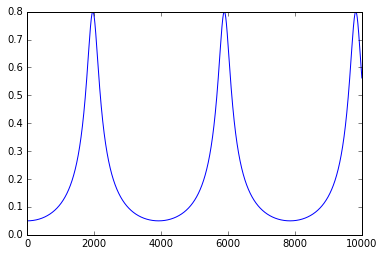

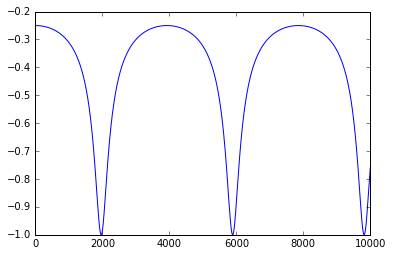

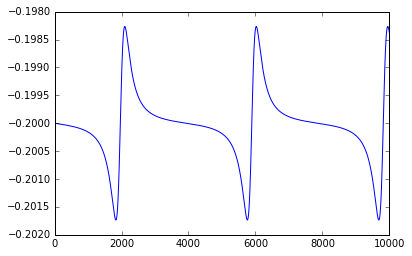

CPU times: user 1.78 s, sys: 1.41 s, total: 3.19 s
Wall time: 1.55 s


In [7]:
%%time

r = np.array([
        2., # X
        0., # Y
    ])

p = np.array([
        0,
        0.1,
    ])

body = Particle(r, p)

locations = np.array([r])
momentums = np.array([p])

for i in range(10000):
    body.evolve_frog()
    pos, mom = np.copy(body.position), np.copy(body.momentum)
    locations = np.vstack((locations, pos))
    momentums = np.vstack((momentums, mom))
    

plt.plot(locations[:,0], locations[:,1])
plt.show()

plt.plot(momentums[:,0], momentums[:,1])
plt.show()

T, V, E = kinetic(momentums), potential(locations), energy(momentums, locations)

plt.plot(T)
plt.show()

plt.plot(V)
plt.show()

plt.plot(E)
plt.show()

# Chenciner

In [79]:
r1 = np.array([0.97000436, -0.24308753])
r2 = -r1
r3 = np.array([0., 0.])

v1 = -v3 / 2.
v2 = -v3 / 2.
v3 = np.array([0.93240737, 0.86473146])

G = 1.
m = 1.

In [81]:
def chenciner_forces(pos1, pos2, pos3):
    """
    Computes the forces between three bodies.
    """
    
    F1 = (G*m*m / np.linalg.norm(pos2 - pos1)**3) * (pos2 - pos1) + (G*m*m / np.linalg.norm(pos3 - pos1)**3) * (pos3 - pos1)
    F2 = (G*m*m / np.linalg.norm(pos3 - pos2)**3) * (pos3 - pos2) + (G*m*m / np.linalg.norm(pos1 - pos2)**3) * (pos1 - pos2)
    F3 = (G*m*m / np.linalg.norm(pos1 - pos3)**3) * (pos1 - pos3) + (G*m*m / np.linalg.norm(pos2 - pos3)**3) * (pos2 - pos3)
    
    return F1, F2, F3

In [89]:
%%time
F1, F2, F3 = chenciner_forces(r1, r2, r3)
particles = [Particle(r1, v1, F1), Particle(r2, v2, F2), Particle(r3, v3, F3)]

locs = [np.array([r1]), np.array([r2]), np.array([r3])]

for i in range(10000):
    Fs = chenciner_forces(*map(lambda x: x.position, particles))
    for i, particle in enumerate(particles):
        particle.evolve_frog(F=Fs[i])
        locs[i] = np.vstack((locs[i], particle.position))

CPU times: user 1.11 s, sys: 7.76 ms, total: 1.12 s
Wall time: 1.12 s


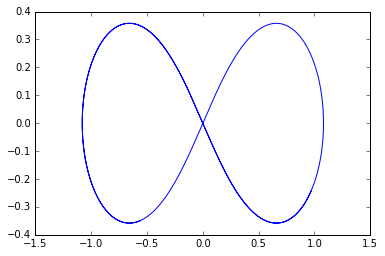

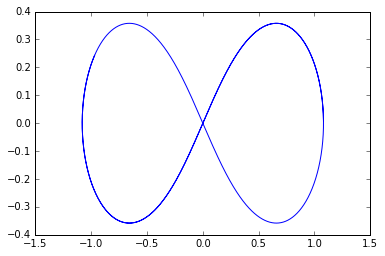

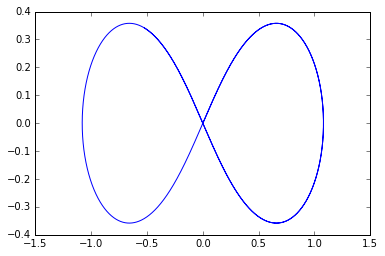

In [90]:
for i in range(3):
    plt.plot(locs[i][:,0], locs[i][:,1])
    plt.show()

In [92]:
import matplotlib.animation as animation

In [124]:
data = np.array(locs)

In [133]:
data.shape

(3, 10001, 2)

In [132]:
def main():
    numframes = 10001

    fig = plt.figure()
    scat = plt.scatter(data[:, 0, 0], data[:, 0, 1], s=100)

    ani = animation.FuncAnimation(fig, update_plot, frames=numframes,
                                  fargs=(data, scat))
    plt.show()

def update_plot(i, data, scat):
    plt.clear()
    scat.
    scat.set_data(data[:,i,0], data[:,i,1])
    return scat,

main()

AttributeError: 'PathCollection' object has no attribute 'set_data'

(-0.4, 0.4)

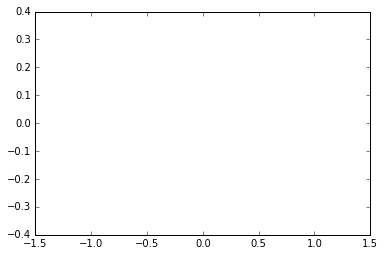

In [162]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1, xlim=(-1.5, 1.5), ylim=(-0.4, 0.4))
ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-0.4, 0.4)

In [163]:
def animate(i):
    ax1.set_xlim(-1.5, 1.5)
    ax1.set_ylim(-0.4, 0.4)
    ax1.clear()
    ax1.set_xlim(-1.5, 1.5)
    ax1.set_ylim(-0.4, 0.4)
    ax1.scatter(data[:,i,0], data[:,i,1])
    ax1.set_xlim(-1.5, 1.5)
    ax1.set_ylim(-0.4, 0.4)
    

In [165]:
%%time
ani = animation.FuncAnimation(fig, animate, frames=10001, interval=1)
ani.save('test.mp4')
plt.show()

CPU times: user 19min 31s, sys: 24min 54s, total: 44min 26s
Wall time: 14min 53s
